In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("news.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


<Axes: xlabel='label', ylabel='count'>

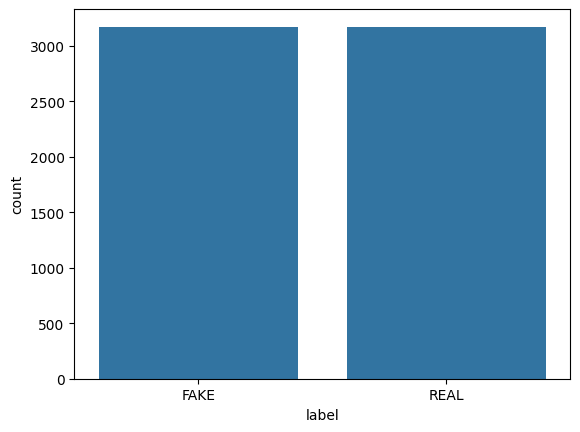

In [6]:
df['label'].nunique()
import seaborn as sns
sns.countplot(x='label',data=df)

In [7]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [8]:
#cleaning
def clean_text(text):
    text=text.str.replace(r"[^A-Za-z0-9 ]","",regex=True)
    return text

df['text']=clean_text(df['text'])
df['title']=clean_text(df['title'])

In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
#Stemming and Removing stopwords 
from nltk.stem import SnowballStemmer
sb=SnowballStemmer('english')
from nltk.corpus import stopwords
sw=stopwords.words('english')

def text_tokenize(text):
    text=text.apply(lambda x: [sb.stem(i.lower()) for i in nltk.word_tokenize(x)]).apply(lambda word: " ".join(word))
    text=text.apply(lambda row:[word for word in nltk.word_tokenize(row) if word not in sw]).apply(lambda word: " ".join(word))
    return text
df['title']=text_tokenize(df['title'])
df['text']=text_tokenize(df['text'])

In [11]:
df

,title,text,label
0,smell hillari fear,daniel greenfield shillman journal fellow free...,0
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,0
2,kerri go pari gestur sympathi,us secretari state john f kerri said monday st...,1
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb 9 2016 lesson tonigh...,0
4,battl new york whi primari matter,primari day new york frontrunn hillari clinton...,1
...,...,...,...
6330,state depart say cant find email clinton speci...,state depart told republican nation committe c...,1
6331,p pbs stand plutocrat pentagon,p pbs stand plutocrat pentagon post oct 27 201...,0
6332,antitrump protest tool oligarchi inform,antitrump protest tool oligarchi reform alway ...,0
6333,ethiopia obama seek progress peac secur east a...,addi ababa ethiopia presid obama conven meet l...,1


In [12]:
#Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
text_vec=TfidfVectorizer()
X_text=text_vec.fit_transform(df['text'])

title_vec=TfidfVectorizer()
X_title=title_vec.fit_transform(df['title'])

from scipy.sparse import hstack
X=hstack([X_title,X_text])
y=df['label']

In [13]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
#Comparing different models
rf=RandomForestClassifier(random_state=42)
sv=SVC(class_weight="balanced")
log=LogisticRegression()
nb=MultinomialNB()
dict_model={}
models=[rf,sv,log,nb]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(X_test)
    print(model)
    dict_model[model]=accuracy_score(y_test,y_pred)*100
    print(accuracy_score(y_test,y_pred)*100)
    print(classification_report(y_test,y_pred))

RandomForestClassifier(random_state=42)
89.32140978432403
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       968
           1       0.90      0.88      0.89       933

    accuracy                           0.89      1901
   macro avg       0.89      0.89      0.89      1901
weighted avg       0.89      0.89      0.89      1901

SVC(class_weight='balanced')
91.74118884797475
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       968
           1       0.95      0.88      0.91       933

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901

LogisticRegression()
91.47816938453445
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       968
           1       0.93      0.89      0.91       933

    accuracy                          

In [15]:
dict_model

{RandomForestClassifier(random_state=42): 89.32140978432403,
 SVC(class_weight='balanced'): 91.74118884797475,
 LogisticRegression(): 91.47816938453445,
 MultinomialNB(): 85.06049447659126}

In [16]:
param_grid={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}

In [17]:
grid_search=GridSearchCV(estimator=sv,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

In [18]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [19]:
best_svc=grid_search.best_estimator_

In [20]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9197100837021333
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [21]:
import pickle
with open("best_svc.pkl",'wb') as obj1:
    pickle.dump(best_svc,obj1)

In [22]:
with open("title.pkl",'wb') as obj2:
    pickle.dump(title_vec,obj2)

In [23]:
with open("text.pkl","wb") as obj3:
    pickle.dump(text_vec,obj3)